<a href="https://colab.research.google.com/github/LAKSHYAMEWARA0025/ML/blob/main/DR_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [92]:
import warnings
warnings.filterwarnings('ignore')
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [93]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [94]:
csv_file=os.path.join(path,"Mall_Customers.csv")
df=pd.read_csv(csv_file)
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Problem Statement

We have data of a Retail Mall and we want to understand the customers better

Task:- Make use of Unsupervised Learning Algorithms(mainly Clustering) to segment the customers into meaningful groups.

# Data Exploration and Cleaning


In [95]:
df.info() #Overall summary -columns with datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [96]:
df.describe() #Descriptive statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [97]:
df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [98]:
df.isnull().sum() #to find the missing value in each column

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [99]:
#2 part is to check the duplicates
df.duplicated().sum() >0

np.False_

In [100]:
df=df.drop(['CustomerID'],axis=1)

In [101]:
df.drop_duplicates()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [102]:
#rename the columns
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [103]:
#Encoding Gender column, Male-1, Female-0
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [104]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# EDA
* Univarite Analysis-histogram/boxplot
* Bivariate Analysis-Scatter plot
* Multivarite Analysis-heatmap

<Axes: xlabel='Age', ylabel='Count'>

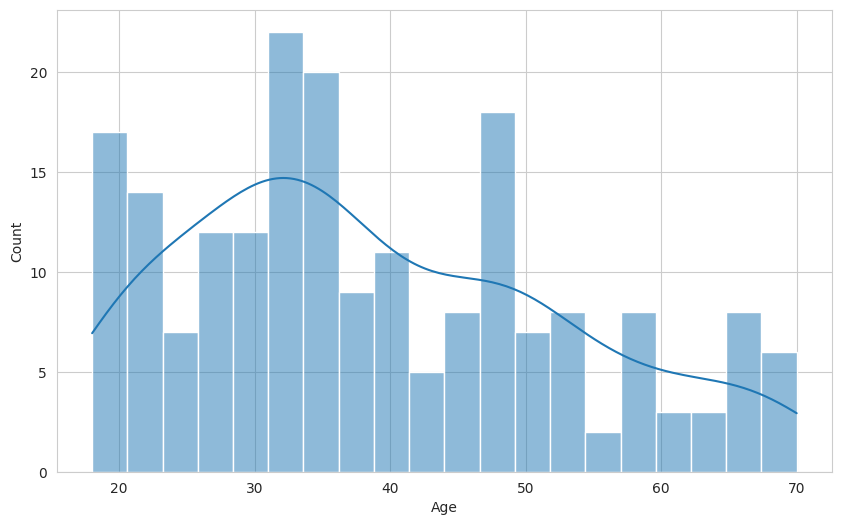

In [105]:
#Plot histogram for every numerical column
sns.histplot(data=df,x='Age',bins=20,kde=True)

In [106]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<Axes: xlabel='Spending_Score', ylabel='Count'>

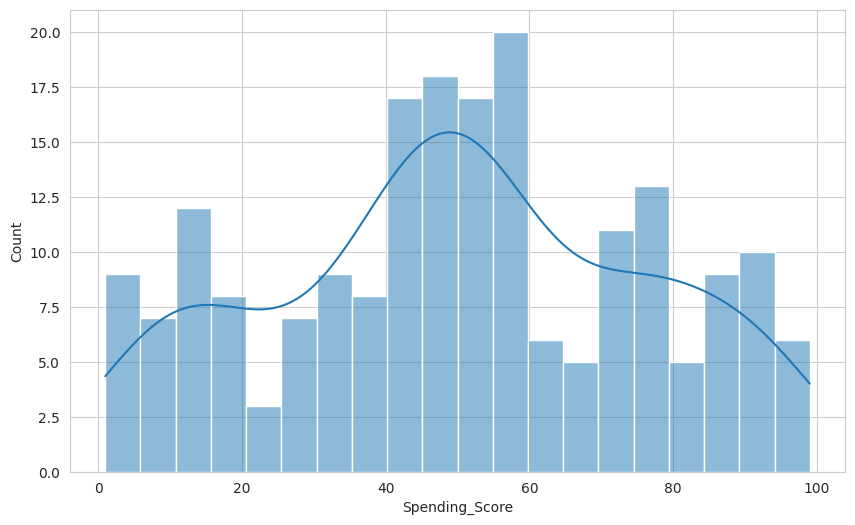

In [107]:
sns.histplot(data=df,x='Spending_Score',bins=20,kde=True)

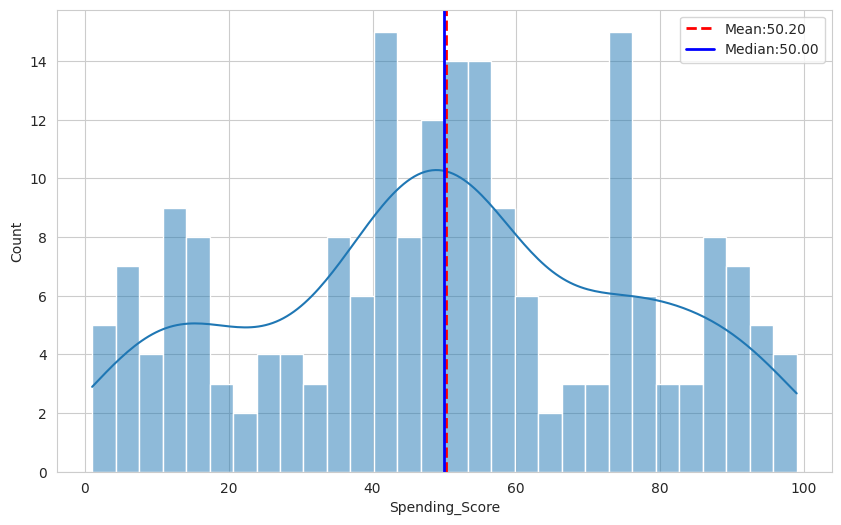

In [108]:
#Let's plot mean and median lines on the above histplot
mean_val=np.mean(df['Spending_Score'])
median_val=np.median(df['Spending_Score'])
sns.histplot(df,x='Spending_Score',bins=30,kde=True)
plt.axvline(mean_val,color='red',linestyle='--',linewidth=2,label=f'Mean:{mean_val:.2f}')
plt.axvline(median_val,color='blue',linestyle='-',linewidth=2,label=f'Median:{median_val:.2f}')
plt.legend()
plt.show()

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

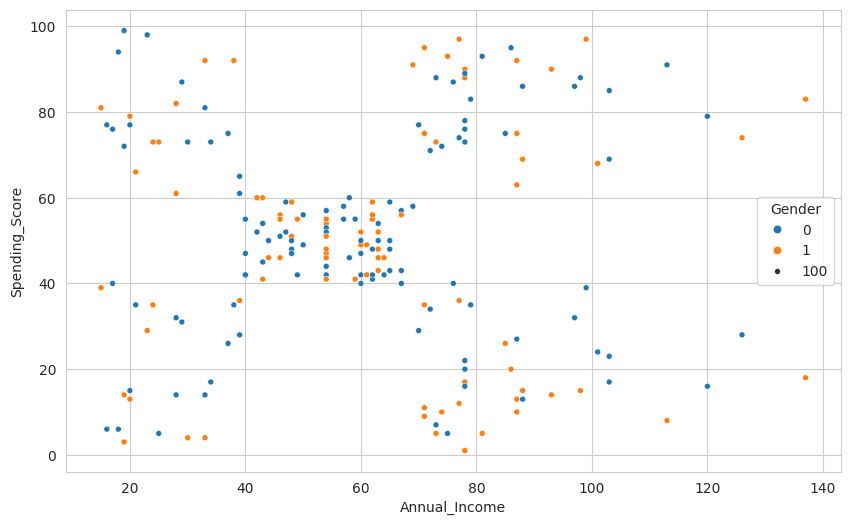

In [109]:
#Bivarite Analysis
sns.scatterplot(data=df,x='Annual_Income',y='Spending_Score',size=100,hue='Gender')

<Axes: >

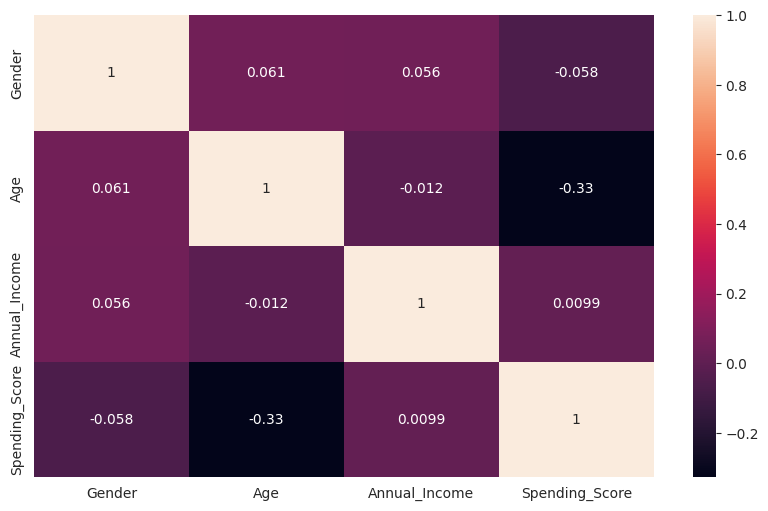

In [110]:
#Multivarite Analysis
correlation=df.corr()
#values are usually between -1 and 1 where 1 means positive correlation, -1 means -ve correlation
# and 0 means no correlation
sns.heatmap(data=correlation,annot=True) #annot matlab numbers

# Dimensionality Reduction

In [111]:
#scale the features
#initialise PCA
#Transfer the Data
#provide explained_variance_ratio

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [112]:
#Initialise PCA
pca=PCA(n_components=4,random_state=42)
X_pca=pca.fit_transform(df_scaled)

#Calculate explained-variance-ratio
evr=pca.explained_variance_ratio_
evr


array([0.33690046, 0.26230645, 0.23260639, 0.16818671])

Text(0.5, 0, 'PC1 (33.7%)')

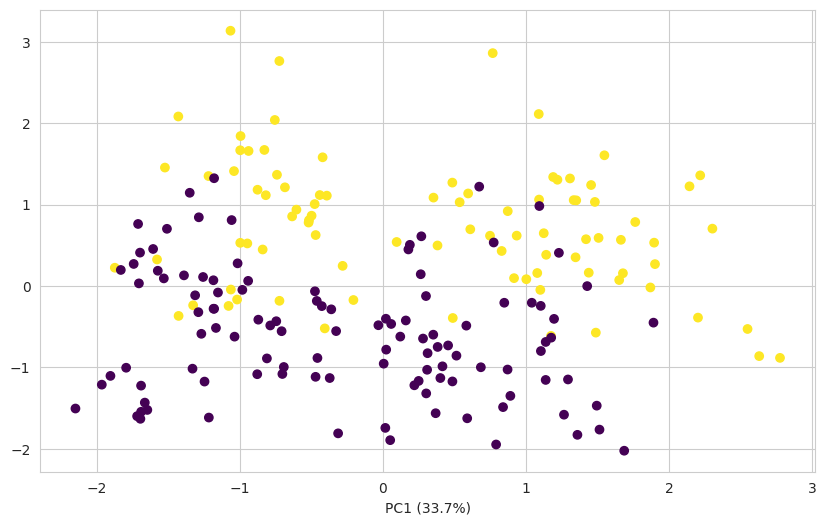

In [113]:
#Plot scatter plt - PC1 vs PC2
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=df['Gender'], cmap='viridis')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")

In [114]:
# For better visualizations in lower dimension, we use t-sne

In [115]:
#import the model
#initialize the model
#fit_transform
#store the results
#evaluate
tsne=TSNE(n_components=2,random_state=42,perplexity=30,n_iter=1000)
X_tsne=tsne.fit_transform(df_scaled)
df_tsne= pd.DataFrame(X_tsne,columns=['tsne1','tsne2'])
df_tsne

,tsne1,tsne2
0,2.425970,-7.152119
1,3.042494,-5.478380
2,-4.405653,14.091286
3,-7.819345,12.497788
4,-4.630795,12.384195
...,...,...
195,4.224168,5.018007
196,-2.495420,2.025393
197,8.641507,-2.970939
198,7.373353,-11.863282


<Axes: xlabel='tsne1', ylabel='tsne2'>

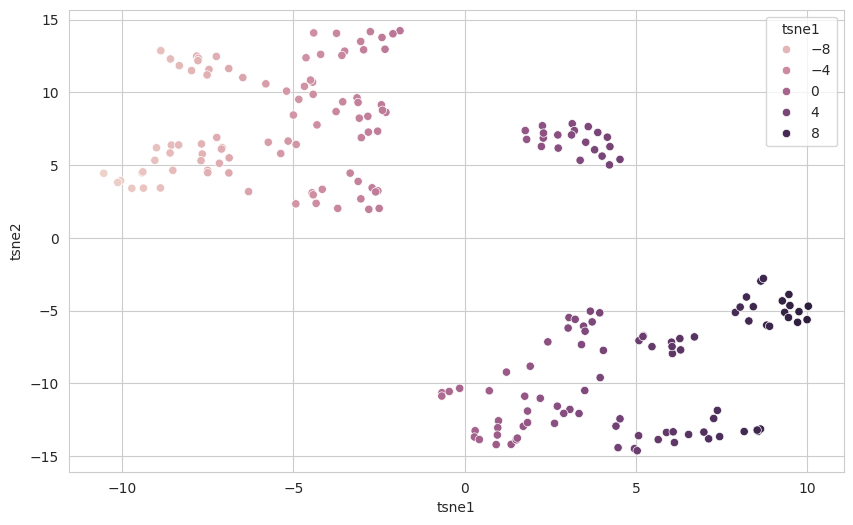

In [116]:
sns.scatterplot(df_tsne,x='tsne1',y='tsne2',hue='tsne1')

# Anomaly Detection

In [117]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [118]:
#IQR -> For now let's do for Annual Income and Spending Score
x_anomaly=df[['Annual_Income','Spending_Score']]
x_anomaly.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [119]:
Q1=x_anomaly.quantile(0.25)
Q3=x_anomaly.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=((x_anomaly<lower_bound) | (x_anomaly>upper_bound)).any(axis=1)
print(outliers)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198     True
199     True
Length: 200, dtype: bool


In [120]:
x_anomaly[outliers]

,Annual_Income,Spending_Score
198,137,18
199,137,83


In [121]:
mean=np.mean(df['Annual_Income'])
threshold=2
std=np.std(df['Annual_Income'])
z=(df['Annual_Income']-mean)/std
# count=z>threshold | z<-threshold
count=x_anomaly[z.abs()>threshold]
print(count)

     Annual_Income  Spending_Score
192            113               8
193            113              91
194            120              16
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83


In [122]:
#Isolation Forest
forest=IsolationForest(n_estimators=100,contamination=0.05,random_state=42)
x_iso=forest.fit_predict(df_scaled)
x_iso

array([-1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1])

In [123]:
iso_outlier=x_iso==-1
print(iso_outlier.sum())

10


In [124]:
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.05)
lof_predict=lof.fit_predict(df_scaled)
lof_outlier=lof_predict==-1
print(lof_outlier.sum())

10


<Axes: xlabel='tsne1', ylabel='tsne2'>

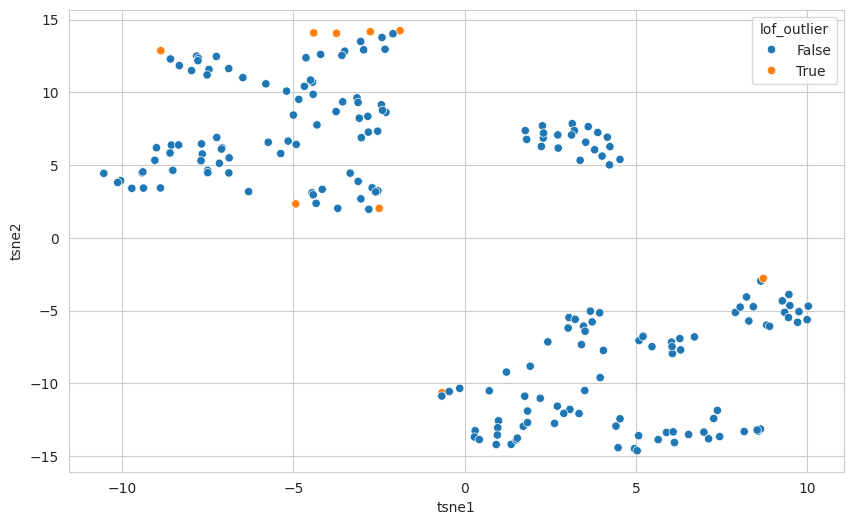

In [125]:
# we need to visualize normal data points vs noise/outliers for isolation forst and lof!
df_tsne['lof_outlier']=lof_outlier
df_tsne['iso_outlier']=iso_outlier
df_tsne.head()
sns.scatterplot(df_tsne,x='tsne1',y='tsne2',hue='lof_outlier')

<Axes: xlabel='tsne1', ylabel='tsne2'>

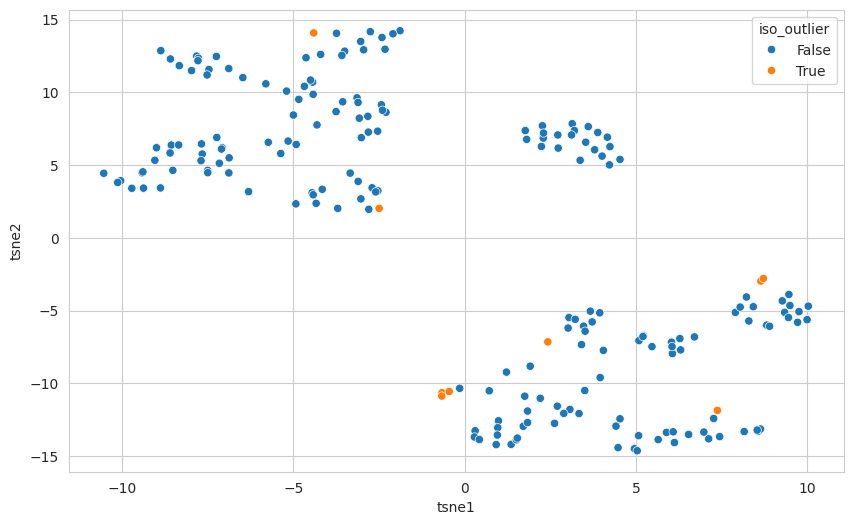

In [126]:
sns.scatterplot(df_tsne,x='tsne1',y='tsne2',hue='iso_outlier')

# Clustering Algorrithm

In [127]:
#1. k-means
inertias=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df_scaled)
  inertias.append(kmeans.inertia_)
print(inertias)


[597.9472937932284, 494.8037500130456, 395.3920903479796, 351.7432061711911, 277.3897401985192, 251.15484911190165, 211.98576294959312, 185.72807688711433, 152.02983429775693]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

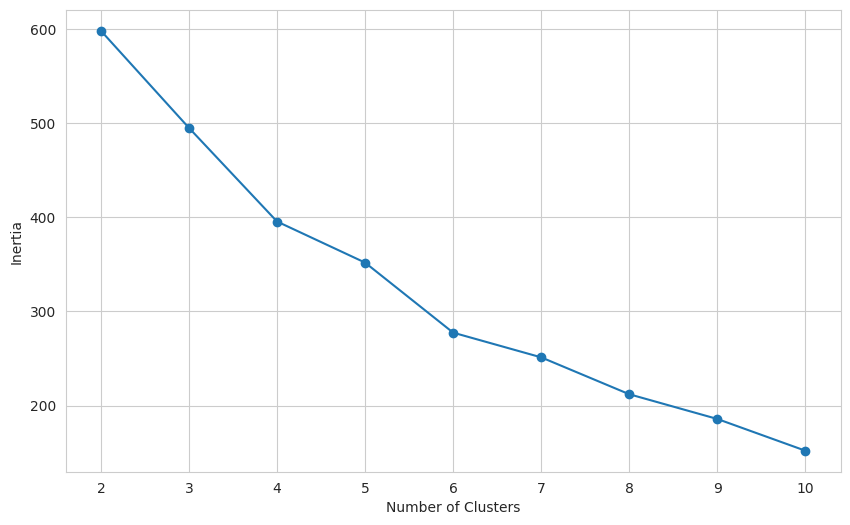

In [128]:
plt.plot(range(2,11),inertias,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt

In [129]:
# we will be doing silhouette score to get a good k-value
s_score=silhouette_score(df_scaled,kmeans.labels_)
print(s_score)

0.42076374869477745


<Axes: xlabel='tsne1', ylabel='tsne2'>

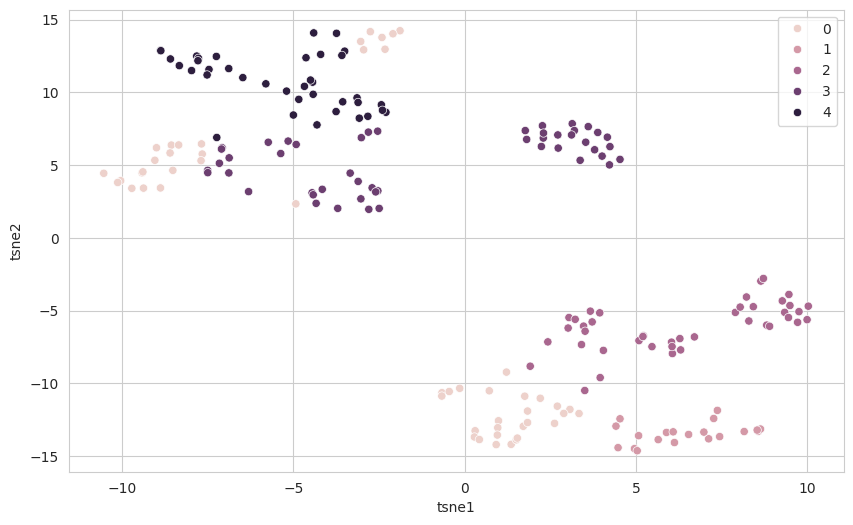

In [130]:
#let's take no of clusters=5
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans_labels=kmeans.fit_predict(df_scaled)
sns.scatterplot(df_tsne,x='tsne1',y='tsne2',hue=kmeans_labels)

<Axes: xlabel='tsne1', ylabel='tsne2'>

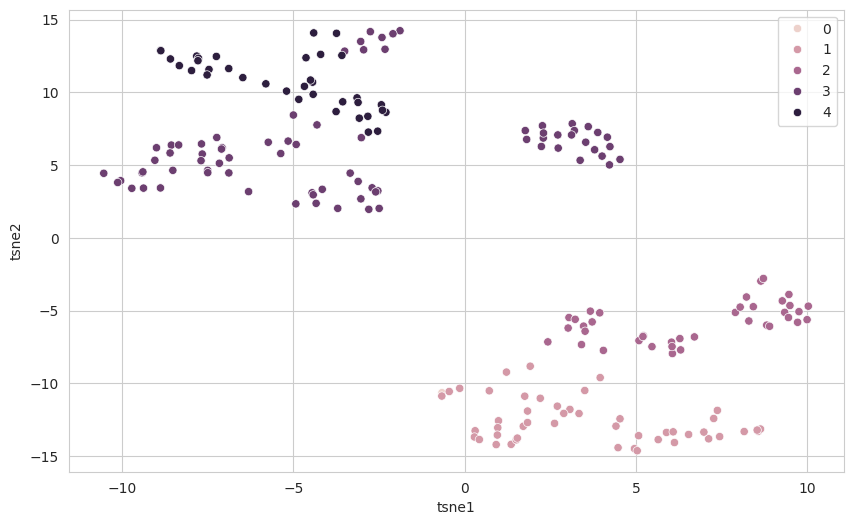

In [131]:
#GMM
gmm=GaussianMixture(n_components=5,random_state=42)
gmm_labels=gmm.fit_predict(df_scaled)
sns.scatterplot(df_tsne,x='tsne1',y='tsne2',hue=gmm_labels)

<Axes: xlabel='tsne1', ylabel='tsne2'>

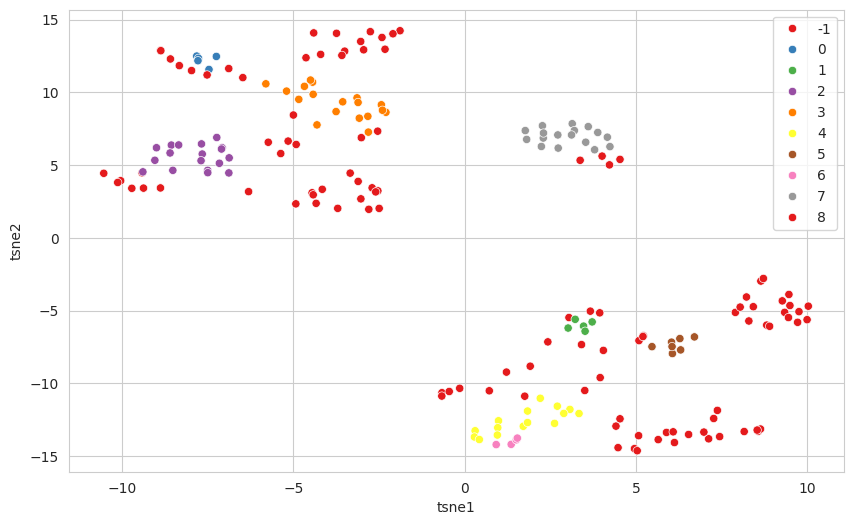

In [132]:
#DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_labels=dbscan.fit_predict(df_scaled)
sns.scatterplot(df_tsne,x='tsne1',y='tsne2',hue=dbscan_labels,palette="Set1")

### PCA Explained Variance Ratio

**Explained Variance Ratio (EVR)** indicates the proportion of variance in the original data that is captured by each principal component. A higher EVR for a component means it explains more of the data's variability. It helps in deciding how many principal components are sufficient to retain most of the information.

From the output of `evr = pca.explained_variance_ratio_`, we observe the following:
- **PC1 (Principal Component 1)**: `0.3369` or approximately **33.7%** of the variance is explained by the first principal component.
- **PC2 (Principal Component 2)**: `0.2623` or approximately **26.2%** of the variance is explained by the second principal component.
- **PC3 (Principal Component 3)**: `0.2326` or approximately **23.3%** of the variance is explained by the third principal component.
- **PC4 (Principal Component 4)**: `0.1682` or approximately **16.8%** of the variance is explained by the fourth principal component.

Together, the first two principal components (PC1 and PC2) capture roughly **60%** of the total variance in the dataset. While this is a significant portion, it also indicates that using only two components for visualization might lead to some loss of information or clarity compared to the original four features. For a comprehensive dimensionality reduction, a higher number of components might be needed, or techniques that preserve more local structure, like t-SNE, could be more effective for visualization.

### PCA Scatter Plot Analysis (PC1 vs PC2)

In the PCA scatter plot (PC1 vs PC2), where points are colored by 'Gender', we can observe the following:

- **General Distribution:** The data points appear somewhat scattered without clear, distinct, and well-separated clusters solely based on PC1 and PC2. There's a general spread of customers across the two principal components.

- **Gender Distribution:** While there isn't a perfect separation, there appears to be a slight tendency for the 'Male' (color depends on `cmap='viridis'`) and 'Female' customers to occupy somewhat different regions, though with considerable overlap. This suggests that 'Gender' contributes to some of the variance captured by PC1 and PC2, but it's not the primary factor defining completely separate groups in this 2D PCA projection.

- **Strengths of PCA:** PCA is effective at reducing dimensionality while preserving global variance. It helps identify the most significant directions of variance in the data. In this plot, it shows that the first two components capture a substantial portion of the overall data variability, but do not clearly separate the customers into distinct, easily interpretable groups when projected onto just these two dimensions, especially concerning gender. The overlap indicates that gender alone does not create linearly separable groups in this principal component space, or that other factors are equally or more influential.

### t-SNE Scatter Plot Analysis (tsne1 vs tsne2)

In the t-SNE scatter plot, where points are colored by their `tsne1` value (which indicates a continuous spectrum, not distinct clusters by `hue='tsne1'` in the previous plot, but still gives an idea of spatial separation), we can observe the following:

- **Clustering Tendencies:** Unlike PCA, t-SNE tends to form more distinct, tighter clusters. We can visually identify several groupings of data points. This suggests that there are inherent, non-linear relationships or local structures in the data that t-SNE is adept at revealing.

- **Local Structure Preservation:** t-SNE is designed to preserve local similarities, meaning that data points that are close together in the high-dimensional space remain close together in the low-dimensional t-SNE representation. This is evident in the formation of these more coherent clusters, which might represent different customer segments.

- **Comparison with PCA:** While PCA revealed a general spread and some subtle tendencies related to gender, t-SNE provides a much clearer picture of potential customer segments. The clusters formed by t-SNE are more compact and visually separated, implying that there are specific groups of customers with similar characteristics that were not as apparent in the PCA projection. The coloring by `tsne1` itself shows a gradient, but if we were to color this by `kmeans_labels` or `gmm_labels` (as done in subsequent cells), the cluster separation would be even more pronounced.

- **Limitations:** It's important to remember that t-SNE's goal is primarily visualization, and the distances between clusters in the t-SNE plot might not accurately reflect their distances in the original high-dimensional space. The size and density of clusters can also be influenced by t-SNE's hyperparameters (like perplexity).

### Comparative Insight: PCA vs. t-SNE

**Effectiveness in Revealing Patterns:**

*   **PCA (Principal Component Analysis):** PCA is a linear dimensionality reduction technique that focuses on preserving the global variance of the data. While it successfully reduced the four features to two principal components that capture a significant portion of the total variance (around 60% for PC1 and PC2), the resulting scatter plot (PC1 vs. PC2) did not reveal clearly separable, distinct clusters. The data points appeared broadly scattered, and even with gender-based coloring, there was substantial overlap, indicating that gender alone does not create linearly separable groups in this principal component space. PCA is excellent for understanding the primary directions of variance and for data compression, but it struggled to highlight underlying customer segments visually in a 2D projection.

*   **t-SNE (t-distributed Stochastic Neighbor Embedding):** t-SNE is a non-linear dimensionality reduction technique that excels at preserving local structures in the data, making it particularly effective for visualizing clusters in high-dimensional datasets. The t-SNE scatter plot (tsne1 vs. tsne2) clearly showed several distinct, tighter clusters of data points. This indicates that t-SNE is more effective at revealing the inherent, non-linear relationships and groupings among customers. These clusters likely represent different customer segments with shared characteristics, which were not apparent in the PCA projection.

**Visual Patterns and Observations:**

*   **PCA:** The PCA plot showed a general spread of data. While it hinted at some distribution differences based on gender, it didn't provide clear boundaries for customer segmentation. The strength of PCA here was in identifying the most influential features contributing to data variability (though not explicitly shown in the plot, it's an inherent part of PCA's function) and for confirming that the first two components account for a good portion of the variance.

*   **t-SNE:** The t-SNE plot demonstrated its ability to pull similar data points closer together and push dissimilar ones apart, forming visually distinct islands or groups. These clusters are crucial for the primary goal of customer segmentation, as they directly suggest potential market segments. The clear separation of these groups highlights t-SNE's superiority over PCA for this particular visualization task, where the goal is to identify underlying patterns and clusters for segmentation.

**Conclusion:**

For the purpose of identifying separable patterns and potential customer segments in this dataset, **t-SNE proved to be significantly more effective than PCA**. While PCA is valuable for understanding global variance and feature importance, t-SNE's strength in preserving local structures allowed for a much clearer and more actionable visualization of customer clusters.

## Compare Anomaly Detection Techniques

### Subtask:
Summarize and compare the findings from IQR, Z-score, Isolation Forest, and Local Outlier Factor (LOF) methods. Discuss the number of outliers detected by each, their consistency, and how effectively they identified unusual data points based on their underlying principles.


**Reasoning**:
First, I will summarize the outliers detected by the IQR method by printing the count of outliers and displaying the actual outlier data points, as requested in the instructions.



In [133]:
print(f"Number of outliers detected by IQR: {outliers.sum()}")
print("Outliers detected by IQR:")
print(x_anomaly[outliers])

Number of outliers detected by IQR: 2
Outliers detected by IQR:
     Annual_Income  Spending_Score
198            137              18
199            137              83


**Reasoning**:
Next, I will summarize the outliers detected by the Z-score method by displaying the `count` DataFrame, as requested in the instructions.



In [134]:
print(f"Number of outliers detected by Z-score (threshold=2 for Annual Income): {len(count)}")
print("Outliers detected by Z-score:")
print(count)

Number of outliers detected by Z-score (threshold=2 for Annual Income): 8
Outliers detected by Z-score:
     Annual_Income  Spending_Score
192            113               8
193            113              91
194            120              16
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83


**Reasoning**:
Now, I will print the total number of outliers detected by Isolation Forest, as specified in the instructions.



In [135]:
print(f"Number of outliers detected by Isolation Forest: {iso_outlier.sum()}")

Number of outliers detected by Isolation Forest: 10


**Reasoning**:
Next, I will print the total number of outliers detected by Local Outlier Factor (LOF), as specified in the instructions.



In [136]:
print(f"Number of outliers detected by Local Outlier Factor (LOF): {lof_outlier.sum()}")

Number of outliers detected by Local Outlier Factor (LOF): 10


## Summary:

### Data Analysis Key Findings

*   **Dimensionality Reduction:**
    *   **PCA** captured approximately 60% of the total variance with its first two components (PC1: 33.7%, PC2: 26.2%) but did not clearly separate customer segments, even with gender-based coloring, indicating a broad scattering of data points.
    *   **t-SNE** proved significantly more effective for visualization, revealing several distinct, tighter clusters due to its ability to preserve local structures, which were not apparent in the PCA projection.

*   **Anomaly Detection:**
    *   **IQR** detected 2 outliers, and **Z-score** identified 8 outliers (for 'Annual\_Income' with a threshold of 2), both statistical methods relying on distributional assumptions.
    *   **Isolation Forest** and **Local Outlier Factor (LOF)** both identified 10 outliers each (with `contamination=0.05`), demonstrating greater consistency and robustness for complex, multi-dimensional data. Outliers detected by these model-based methods visually appeared at the periphery or in less dense regions on t-SNE plots.

*   **Clustering:**
    *   **KMeans** clustering, with an elbow point suggesting 5-6 clusters and a silhouette score of approximately 0.42 for `k=5`, produced distinct, somewhat spherical clusters on the t-SNE plot, but assumes fixed shapes and assigns all points to a cluster.
    *   **Gaussian Mixture Models (GMM)**, using `n_components=5`, showed visual cluster structures on t-SNE similar to KMeans but with potentially more nuanced boundaries due to its probabilistic nature and flexibility in modeling ellipsoidal shapes.
    *   **DBSCAN** demonstrated a significantly different clustering pattern on t-SNE, identifying arbitrarily shaped clusters and explicitly labeling noise points (outliers) as -1, highlighting its density-based approach and robust outlier handling without requiring a pre-defined number of clusters.

